# STAT 201A Problem Set (Nov. 20th Lab)
### December 3rd, 2023
### Author: Austin Tao

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(342)

## Question 1: Simulation of Markov Process

**(a)**
Our Markov chain can be represented in a transition matrix 

$$
P = 
\begin{bmatrix}
    0.2 & 0.7 & 0.1 \\
    0.2 & 0.5 & 0.3 \\
    0.2 & 0.4 & 0.4
\end{bmatrix}
$$

**(b)**
Now, let us simulate one realization of this chain.

In [3]:
def sim_markov_step(transition_matrix, current_state):
    """Simulate one step of a markov process

    Args:
        transition_matrix: matrix of transition probabilities
        current_state: the current state of the process

    Returns:
        next_state: the next state selected in the process

    """
    next_state = np.random.choice([1, 2, 3], p = transition_matrix[current_state - 1])

    return next_state


In [4]:
# input our parameters
P = np.array([[0.2, 0.7, 0.1], [0.2, 0.5, 0.3], [0.2, 0.4, 0.4]])
X_0 = 1
epochs = 20

for i in range(epochs):
    print("Step {}: {}".format(i, sim_markov_step(P, X_0)))
    X_0 = sim_markov_step(P, X_0)

Step 0: 1
Step 1: 1
Step 2: 3
Step 3: 2
Step 4: 2
Step 5: 2
Step 6: 3
Step 7: 2
Step 8: 3
Step 9: 2
Step 10: 3
Step 11: 1
Step 12: 2
Step 13: 3
Step 14: 2
Step 15: 2
Step 16: 1
Step 17: 1
Step 18: 1
Step 19: 2


## Question 2: Stationary Distribution

**(a)** We want to find the theoretical stationary state of the process by finding the eigenvector with eigenvalue equal to 1:


In [11]:
# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(P)
eigenvectors[:, np.isclose(eigenvalues, 1)]



array([[0.57735027],
       [0.57735027],
       [0.57735027]])

**(b)** Now, if we were to assume an initial distribution $\boldsymbol{\pi}_0 = [1, 0, 0]$, we can simulate how the values of $\boldsymbol{\pi}_i$ evolves over time.

In [6]:
def sim_markov_process(pi_i, P):
    """Simulate one step in how the distribution pi_i changes in markov process

    Args:
        pi_i: current distribution
        P: transition matrix

    Returns:
        pi_n: the new distribution after one step

    """
    pi_n = pi_i @ P
    return pi_n


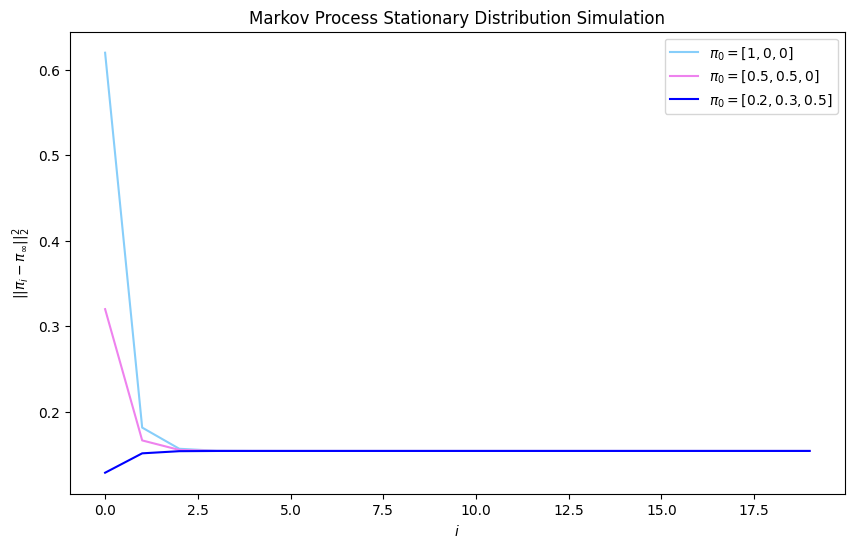

In [19]:
# initlaize parameters
pi_0 = np.array([1, 0, 0])
pi_0_2 = np.array([0.5, 0.5, 0])
pi_0_3 = np.array([0.2, 0.3, 0.5])

epochs = 20
L2_norms = np.zeros(epochs)
L2_norms_2 = np.zeros(epochs)
L2_norms_3 = np.zeros(epochs)

# get the theoretical true stationary distribution
eigenvalues, eigenvectors = np.linalg.eig(P)
pi_true = eigenvectors[:, np.isclose(eigenvalues, 1)]
pi_true /= np.sum(pi_true)

for i in range(epochs):
    pi_0 = pi_0 @ P
    pi_0_2 = pi_0_2 @ P
    pi_0_3 = pi_0_3 @ P
    L2_norms[i] = np.abs(np.sum((pi_0 - pi_true)**2))
    L2_norms_2[i] = np.abs(np.sum((pi_0_2 - pi_true)**2))
    L2_norms_3[i] = np.abs(np.sum((pi_0_3 - pi_true)**2))

# plotting
plt.figure(figsize=(10, 6))
plt.plot(L2_norms, label = "$\pi_0 = [1, 0, 0]$", color = "lightskyblue")
plt.plot(L2_norms_2, label = "$\pi_0 = [0.5, 0.5, 0]$", color = "violet")
plt.plot(L2_norms_3, label = "$\pi_0 = [0.2, 0.3, 0.5]$", color = "blue")
plt.xlabel("$i$")
plt.ylabel("$||\pi_i - \pi_{\infty}||_2^2$")
plt.title("Markov Process Stationary Distribution Simulation")
plt.legend()
plt.show()

## Question 3: Absorbing State

**(a)** We want to simulate the distribution of arrival time.

In [8]:
def t_arrival(transition_matrix, X_0, X_end):
    """Count the waiting time to go from X_0 to X_end given transition matrix P

    Args:
        transition_matrix: matrix of transition probabilities
        current_state: the current state of the process

    Returns:
        t_arrive: time to arrive to X_end

    """
    t_arrive = 0
    while X_0 != X_end:
        X_0 = sim_markov_step(transition_matrix, X_0)
        t_arrive += 1

    return t_arrive



X_0 = 1 Mean arrival time: 4.6381
X_0 = 2 Mean arrival time: 3.8739


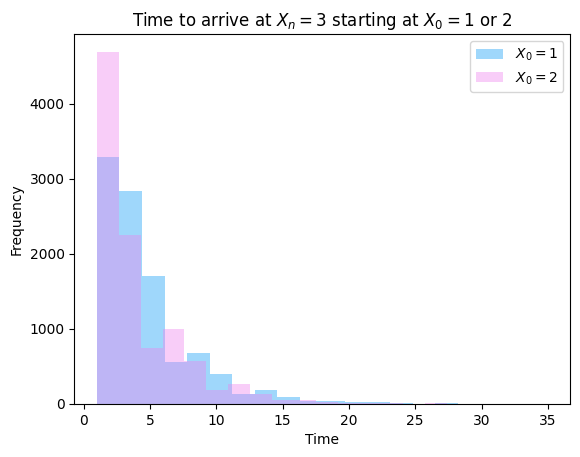

In [9]:
X_01 = 1
X_02 = 2
X_end = 3
t_arrive_1 = []
t_arrive_2 = []
n_sims = 10000

# perform simulations
for n in range(n_sims):
    t_arrive_1.append(t_arrival(P, X_01, X_end))
    t_arrive_2.append(t_arrival(P, X_02, X_end)) 

# display results of simulation
print("X_0 = 1 Mean arrival time: {}".format(np.mean(t_arrive_1)))
print("X_0 = 2 Mean arrival time: {}".format(np.mean(t_arrive_2)))
    
# plotting
n_bins = 20

plt.hist(t_arrive_1, bins = n_bins, alpha = 0.8, label = "$X_0 = 1$", color = "lightskyblue")
plt.hist(t_arrive_2, bins = n_bins, alpha = 0.4, label = "$X_0 = 2$", color = "violet")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.title("Time to arrive at $X_n = 3$ starting at $X_0 = 1$ or 2")
plt.legend()
plt.show()

**(b)** Now, we want to calculate the theoretical mean arrival time to the absorbing state starting at both $X_0 = 1$ and $X_0 = 2$. Let $T_i$ be the random variable representing arrival time with $X_0 = i$. We have that 
$$
\mu_i = 1 + \sum_{j = 1}^3 p_{ij}\mu_j
$$
which means we have a system of equations:
\begin{align}
    \mu_1 &= 1 + p_{11}\mu_1 + p_{12}\mu_2 \\
    \mu_2 &= 1 + p_{21}\mu_1 + p_{22}\mu_2
\end{align}
solving this system gives $\mu_1 = 4.615$ and $\mu_2 = 3.846$, which is very close to the simulation results.
